# Pandas version history

This document is based on the [tutorial by calmcode.io](https://calmcode.io/gazpacho/introduction.html)

Here we're reading html from the page supplied by the url.

In [145]:
url = "https://pypi.org/project/pandas/#history"

from gazpacho import get

html = get(url)

We use function find of object Soupt to get specific tags and/or classes of objects from the html doc.

In [146]:
from gazpacho import Soup

soup = Soup(html)
cards = soup.find("a", {"class": "card"})

Parameter partial allows us to either select by full or partial tag/class.

In [147]:
cards[0].find("p", {"class": "release__version"}, partial=False)

<p class="release__version">
                  1.4.1
                </p>

In [148]:
cards[0].find("p", {"class": "release__version"}, partial=True)

[<p class="release__version">
                   1.4.1
                 </p>,
 <p class="release__version-date">
   <time datetime="2022-02-12T11:21:13+0000" data-controller="localized-time" data-localized-time-relative="true" data-localized-time-show-time="false">
   Feb 12, 2022
 </time>
 </p>]

We use attrs function to get the attributes of the tag, instead of the text within the tag.

In [149]:
# this is a dictionary
cards[0].find("time").attrs

{'datetime': '2022-02-12T11:21:13+0000',
 'data-controller': 'localized-time',
 'data-localized-time-relative': 'true',
 'data-localized-time-show-time': 'false'}

We're specifically interested in the datetime attribute.

In [150]:
# this is the information we're interested in
cards[0].find("time").attrs["datetime"]

'2022-02-12T11:21:13+0000'

Full process to get the list of dictionaries.

In [151]:
from gazpacho import get, Soup

url = "https://pypi.org/project/pandas/#history"

html = get(url)
soup = Soup(html)
cards = soup.find("a", {"class": "card"})


def parse_card(card):
    version = card.find("p", {"class": "release__version"}, partial=False).text
    timestamp = card.find("time").attrs["datetime"]
    return {"version": version, "timestamp": timestamp}


data_list = [parse_card(c) for c in cards]

We can use pandas to process that list of dictionaries into a convenient format.

In [152]:
import pandas as pd

pandas_df = (pd.DataFrame(data_list).assign(timestamp=lambda d: pd.to_datetime(d["timestamp"])))
pandas_df

,version,timestamp
0,1.4.1,2022-02-12 11:21:13+00:00
1,1.4.0,2022-01-22 14:47:00+00:00
2,1.4.0rc0,2022-01-06 11:01:13+00:00
3,1.3.5,2021-12-12 14:30:49+00:00
4,1.3.4,2021-10-17 16:42:57+00:00
...,...,...
80,0.4.1,2011-09-26 01:22:28+00:00
81,0.4.0,2011-09-12 19:41:11+00:00
82,0.3.0,2011-02-20 01:00:04+00:00
83,0.2,2010-05-18 13:14:26+00:00


In [153]:
pandas_df.timestamp.describe()

C:\Users\admin\AppData\Local\Temp\ipykernel_17724\4113914722.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  pandas_df.timestamp.describe()


count                            85
unique                           85
top       2022-02-12 11:21:13+00:00
freq                              1
first     2009-12-25 22:55:48+00:00
last      2022-02-12 11:21:13+00:00
Name: timestamp, dtype: object

In [154]:
pandas_df['year'] = pd.DatetimeIndex(pandas_df.timestamp).year
pandas_df

,version,timestamp,year
0,1.4.1,2022-02-12 11:21:13+00:00,2022
1,1.4.0,2022-01-22 14:47:00+00:00,2022
2,1.4.0rc0,2022-01-06 11:01:13+00:00,2022
3,1.3.5,2021-12-12 14:30:49+00:00,2021
4,1.3.4,2021-10-17 16:42:57+00:00,2021
...,...,...,...
80,0.4.1,2011-09-26 01:22:28+00:00,2011
81,0.4.0,2011-09-12 19:41:11+00:00,2011
82,0.3.0,2011-02-20 01:00:04+00:00,2011
83,0.2,2010-05-18 13:14:26+00:00,2010


In [155]:
pandas_df.year.unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009], dtype=int64)

In [156]:
pandas_df.year.nunique()

14

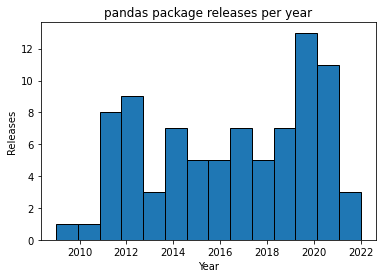

In [157]:
import matplotlib.pyplot as plt
matplotlib_plot = plt.hist(pandas_df.year,
         edgecolor='black',
         bins=pandas_df.year.nunique());
plt.xlabel('Year')
plt.ylabel('Releases')
plt.title('pandas package releases per year')
plt.show()

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Releases'),
 Text(0.5, 1.0, 'pandas package releases per year')]

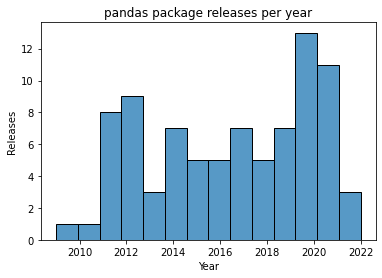

In [158]:
import seaborn as sns
seaborn_plot = sns.histplot(pandas_df.year,
             bins = pandas_df.year.nunique());
#sns.xlabel('Year')
#sns.ylabel('Releases')
seaborn_plot.set(xlabel='Year',
                 ylabel='Releases',
                 title='pandas package releases per year')